In [1]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install --upgrade ta
import ta
#pip install --upgrade ta-lib
#import talib
!pip install talib-binary
import talib
import seaborn as sns
import numpy as np

  Created wheel for ta: filename=ta-0.7.0-cp37-none-any.whl size=28716 sha256=1c6eda95f630327a2a2dcc88ca8849a3d21be9135953ed47c773173ec23a051b
  Stored in directory: /root/.cache/pip/wheels/dd/88/30/de9553fb54a474eb7480b937cdbb140bdda613d29cf4da7994
Successfully built ta
     |████████████████████████████████| 2.4MB 15.1MB/s 


In [2]:
#Load the data - AMD
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab


Saving AMD.csv to AMD.csv


In [3]:
#Load the data - LNG
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab

Saving LNG.csv to LNG.csv


In [4]:
#Load the data - SPY
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab

Saving SPY.csv to SPY.csv


In [70]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
amd_df = pd.read_csv('AMD.csv', parse_dates=['Date'], index_col='Date', date_parser=dateparse)
amd_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-07-05,5.03,5.05,4.88,4.96,4.96,16332500
2016-07-06,4.91,5.11,4.90,5.04,5.04,19392900
2016-07-07,5.07,5.10,4.94,5.02,5.02,15813800
2016-07-08,4.84,5.15,4.82,5.10,5.10,28140700
2016-07-11,5.13,5.19,5.00,5.01,5.01,21027900


In [71]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
lng_df = pd.read_csv('LNG.csv', parse_dates=['Date'], index_col='Date', date_parser=dateparse)
lng_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-07-05,37.759998,38.189999,35.860001,37.139999,37.139999,3322700
2016-07-06,36.820000,37.500000,36.500000,37.020000,37.020000,4054700
2016-07-07,37.580002,37.869999,36.669998,37.099998,37.099998,3115400
2016-07-08,37.480000,38.080002,37.060001,37.660000,37.660000,2057400
2016-07-11,38.340000,38.389999,37.330002,37.750000,37.750000,1718300


In [72]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
spy_df = pd.read_csv('SPY.csv', parse_dates=['Date'], index_col='Date', date_parser=dateparse)
spy_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-07-05,208.949997,209.080002,207.710007,208.410004,190.564194,109803700
2016-07-06,207.830002,209.800003,207.059998,209.660004,191.707199,96021500
2016-07-07,209.869995,210.649994,208.630005,209.529999,191.588303,85593800
2016-07-08,211.050003,212.940002,210.779999,212.649994,194.441162,133971000
2016-07-11,213.190002,214.070007,212.949997,213.399994,195.126953,73633900


<function matplotlib.pyplot.show>

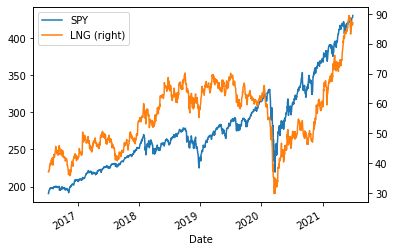

In [73]:
# Plotting the Adj_Close columns for SPY and LNG

#As you see, for stocks data it is usually right skewed, reflecting positive growth
spy_df['Adj Close'].plot(label='SPY', legend=True)
lng_df['Adj Close'].plot(label='LNG', legend = True, secondary_y=True)
plt.show  # show the plot
#plt.clf()  # clear the plot space



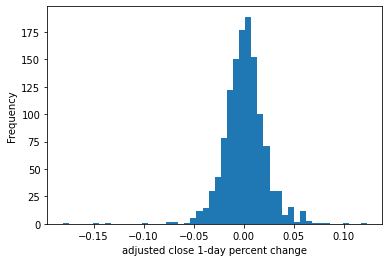

In [74]:
# Histogram of the daily price change percent of Adj_Close for LNG
lng_df['Adj Close'].pct_change().plot.hist(bins=50)
plt.xlabel('adjusted close 1-day percent change')
plt.show()

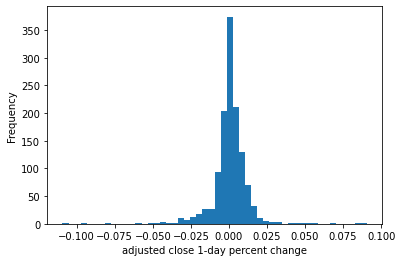

In [75]:
# Histogram of the daily price change percent of Adj_Close for LNG
spy_df['Adj Close'].pct_change().plot.hist(bins=50)
plt.xlabel('adjusted close 1-day percent change')
plt.show()

In [76]:
#Checking correlation is very important
#If we use the same time periods for previous price changes and future price changes, 
#we can see if the stock price is mean-reverting (bounces around) or trend-following (goes up if it has been going up recently).

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000             0.000101
5d_close_future_pct      0.000101             1.000000


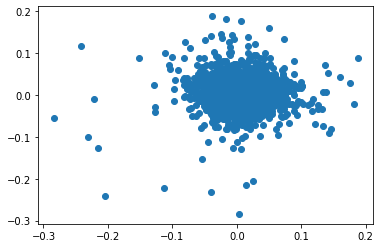

In [77]:

#Key read: https://towardsdatascience.com/all-the-pandas-shift-you-should-know-for-data-analysis-791c1692b5e

#df.shift(1) shifts data 1 day ahead, and shift(-1) brings tomorrow's data on today's date.

# Create <5-day % changes> of Adj_Close for the current day, and 5 days in the future
lng_df['5d_future_close'] = lng_df['Adj Close'].shift(-5)
lng_df['5d_close_future_pct'] = lng_df['5d_future_close'].pct_change(5)     ##so hist pct_change over next 5 days from today
lng_df['5d_close_pct'] = lng_df['Adj Close'].pct_change(5)  #so hist pct_change over last 5 days until today

# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = lng_df[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

# Scatter the current 5-day percent change vs the future 5-day percent change
plt.scatter(lng_df['5d_close_pct'], lng_df['5d_close_future_pct'])
plt.show()

Imp Question

In [78]:
#How do we account for splits etc, how is it adjusted
#In the case of a 2-for-1 split, we divide all of the historical prices for the stock by 2, 
#then multiply all of the historical volume by 2 so that the bars prior to the split match up smoothly with the bars that appear after the split.

remember that for TA-Lib functions (such as SMA()), you need to provide Numpy arrays, not pandas objects. You can use the .values attribute of a pandas Series or DataFrame to return it as a Numpy array.

If RSI close to 0, it is soon to rebound from recent loss
If RSI close to 100, it is soon to decline;

In [79]:
feature_names = ['5d_close_pct']  # we create a list of the feature names for later

# Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
for n in [14,30,50,200]:

    # Create the moving average indicator and divide by Adj_Close
    lng_df['ma' + str(n)] = talib.SMA(lng_df['Adj Close'].values,  #Normalize the moving averages with the adjusted close by dividing by Adj_Close.
                              timeperiod=n) / lng_df['Adj Close']   #Its not that imp to divide though, as just talib.SMA will give SMA
    # Create the RSI indicator
    lng_df['rsi' + str(n)] = talib.RSI(lng_df['Adj Close'].values, timeperiod=n)
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

print(feature_names)

['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200']


In [80]:
# Drop all na values
lng_df = lng_df.dropna()

# Create features and targets
#As ML models need features and one target
# use feature_names for features; keep a new column '5d_close_future_pct' that will serve as our target
features = lng_df[feature_names]
targets = lng_df['5d_close_future_pct']

# Create DataFrame from target column and feature columns, so it has all things we want correlation in between of.
feature_and_target_cols = ['5d_close_future_pct'] + feature_names
print(feature_and_target_cols)
feat_targ_df = lng_df[feature_and_target_cols]


# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

['5d_close_future_pct', '5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200']
                     5d_close_future_pct  5d_close_pct  ...     ma200    rsi200
5d_close_future_pct             1.000000      0.007495  ...  0.042311 -0.036992
5d_close_pct                    0.007495      1.000000  ... -0.256866  0.218849
ma14                           -0.046119     -0.844733  ...  0.436263 -0.357215
rsi14                           0.027378      0.660203  ... -0.552439  0.530329
ma30                           -0.046698     -0.632462  ...  0.638035 -0.498835
rsi30                           0.029286      0.517535  ... -0.756616  0.708983
ma50                           -0.010203     -0.481712  ...  0.772969 -0.599909
rsi50                           0.022611      0.425367  ... -0.866110  0.821745
ma200                           0.042311     -0.256866  ...  1.000000 -0.878989
rsi200                         -0.036992      0.218849  ... -0.878989  1.000000

[10 rows 

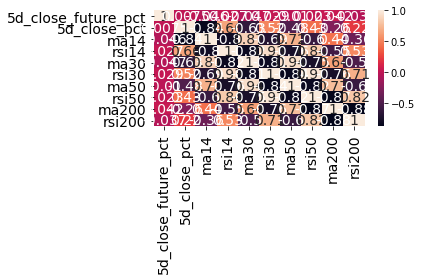

In [81]:
# Plot heatmap of correlation matrix
sns.heatmap(corr, annot= True, annot_kws = {"size": 14})
plt.yticks(rotation=0, size = 14); plt.xticks(rotation=90, size = 14)  # fix ticklabel directions and size
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot

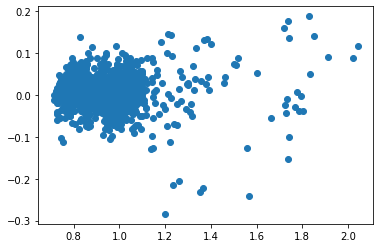

In [82]:
plt.scatter(lng_df['ma200'], lng_df['5d_close_future_pct'])
plt.show()

In [83]:
#Using sklearn test split functions, we split our data into train and test randomly.
#To take train data as old data, and test data as new one, lets use statsmodels

In [84]:
# Import the statsmodels.api library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)          #We need to add a constant for the y intercept. Since it is features that are the x and target is the y, 
                                                      # we add constant term, i.e 1 to x.

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.85 * features.shape[0])         #Get 85% of total rows
train_features = linear_features[:train_size]                   #Python indexing follows the pattern [start:stop:step]. 
train_targets = targets[:train_size]                    #Leave start blank if you want to start from the beginning of the list/array.
test_features = linear_features[train_size:]
test_targets = targets[train_size:] 
print(linear_features.shape, train_features.shape, test_features.shape)
print(train_targets.shape, test_targets.shape)

(1053, 10) (895, 10) (158, 10)
(895,) (158,)


In [85]:
#We take a p-value of less than 0.05 to mean the coefficient is significantly different from 0.

In [86]:
# Create the linear model and complete the least squares fit
model = sm.OLS(train_targets, train_features)  #Model needs targets and features
results = model.fit()  # fit the model
print(results.summary())

# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results.pvalues)

# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)   #Model.predict
test_predictions = results.predict(test_features)

                             OLS Regression Results                            
Dep. Variable:     5d_close_future_pct   R-squared:                       0.089
Model:                             OLS   Adj. R-squared:                  0.080
Method:                  Least Squares   F-statistic:                     9.659
Date:                 Tue, 06 Jul 2021   Prob (F-statistic):           3.64e-14
Time:                         10:15:43   Log-Likelihood:                 1533.5
No. Observations:                  895   AIC:                            -3047.
Df Residuals:                      885   BIC:                            -2999.
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3459      0.124    

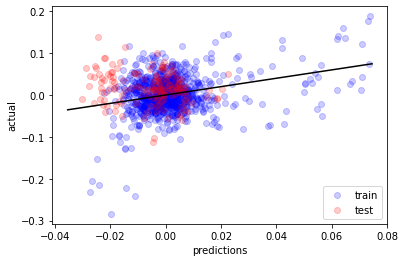

In [87]:
# Scatter the predictions vs the targets with 20% opacity
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')  #Plot training data predictions vs targets
plt.scatter(test_predictions, test_targets, alpha=0.2, color='r', label='test')     #Plot test data predictions vs targets

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()

In [88]:
# Create 2 new volume features, 1-day % change and 5-day SMA of the % change
new_features = ['Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']
feature_names.extend(new_features)

remember that for TA-Lib functions (such as SMA()), you need to provide Numpy arrays, not pandas objects. You can use the .values attribute of a pandas Series or DataFrame to return it as a Numpy array.

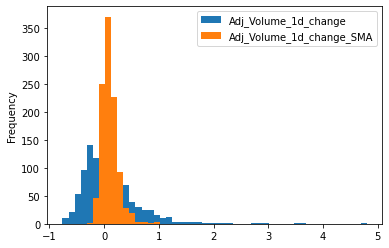

In [89]:
lng_df['Adj_Volume_1d_change'] = lng_df['Volume'].pct_change()
lng_df['Adj_Volume_1d_change_SMA'] = talib.SMA(lng_df['Adj_Volume_1d_change'].values,
                                               timeperiod=5)   #as we wanted 5 day moving average

# Plot histogram of volume % change data
lng_df[new_features].plot(kind='hist', sharex=False, bins=50)
plt.show()

In [90]:
# Use pandas' get_dummies function to get dummies for day of the week
days_of_week = pd.get_dummies(lng_df.index.dayofweek,
                              prefix='weekday',
                              drop_first=True)   #get monday etc as weekday_1 and drop_first as it can be inferred as first day when all others are 0

# Set the index as the original dataframe index for merging
days_of_week.index = lng_df.index

# Join the dataframe with the days of week dataframe
lng_df = pd.concat([lng_df, days_of_week], axis=1)

# Add days of week to feature names
feature_names.extend(['weekday_' + str(i) for i in range(1, 5)])
lng_df.dropna(inplace=True)  # drop missing values in-place
print(lng_df.head())

                 Open       High        Low  ...  weekday_2  weekday_3  weekday_4
Date                                         ...                                 
2017-04-27  45.799999  46.139999  45.150002  ...          0          1          0
2017-04-28  45.540001  45.750000  45.160000  ...          0          0          1
2017-05-01  45.150002  45.740002  45.000000  ...          0          0          0
2017-05-02  45.880001  46.400002  45.639999  ...          0          0          0
2017-05-03  45.759998  46.099998  45.270000  ...          1          0          0

[5 rows x 23 columns]


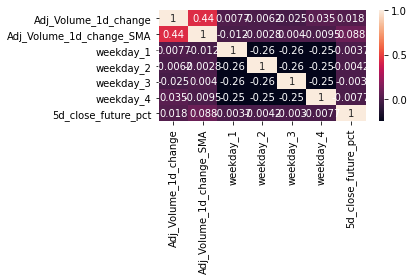

In [91]:
# Add the weekday labels to the new_features list
new_features.extend(['weekday_' + str(i) for i in range(1, 5)])

# Plot the correlations between the new features and the targets
sns.heatmap(lng_df[new_features + ['5d_close_future_pct']].corr(), annot=True)
plt.yticks(rotation=0)  # ensure y-axis ticklabels are horizontal
plt.xticks(rotation=90)  # ensure x-axis ticklabels are vertical
plt.tight_layout()
plt.show()

In [92]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

# Fit the model to the training features and targets
decision_tree.fit(train_features, train_targets)

# Check the score on train and test
print(decision_tree.score(train_features, train_targets))
print(decision_tree.score(test_features, test_targets))

0.9999984627075906
-1.2891391841885018


In [93]:
# Loop through a few different max depths and check the performance
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth = d)
    decision_tree.fit(train_features, train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(train_features, train_targets))
    print(decision_tree.score(test_features, test_targets), '\n')

max_depth= 3
0.19919907674297976
-0.17213441431869603 

max_depth= 5
0.3810897001549668
-0.2649368039898874 

max_depth= 10
0.553910719490195
-0.6423407573646409 



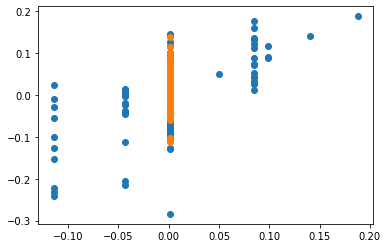

In [94]:
# Use the best max_depth of 3 from last exercise to fit a decision tree, as for test data max_depth 3 has the least negative value
decision_tree = DecisionTreeRegressor(max_depth = 3)
decision_tree.fit(train_features, train_targets)

# Predict values for train and test
train_predictions = decision_tree.predict(train_features)
test_predictions = decision_tree.predict(test_features)

# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

In [95]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
#Estimators is how many trees do you want, depth is the level of depth of trees you want
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.9179954740905591
-0.44479465350083136


#Max_features - number of features we sample at each split
#Estimators is how many trees do you want, depth is the level of depth of trees you want
Random state ensures that the splits that you generate are reproducible. Scikit-learn uses random permutations to generate the splits. The random state that you provide is used as a seed to the random number generator. This ensures that the random numbers are generated in the same order.

In [96]:
from sklearn.model_selection import ParameterGrid

# Create a dictionary of hyperparameters to search
grid = {'n_estimators': [200], 'max_depth': [3], 'max_features': [4, 8], 'random_state': [42]}
test_scores = []

#grid is basically a dict of multiple parameter values

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_features, train_targets)
    test_scores.append(rfr.score(test_features, test_targets))

# Find best hyperparameters from the test score and print

#numpy function argmax chooses best/max test_scores and returns its index and stores it in best_idx

best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

-0.18476848071633833 {'random_state': 42, 'n_estimators': 200, 'max_features': 8, 'max_depth': 3}


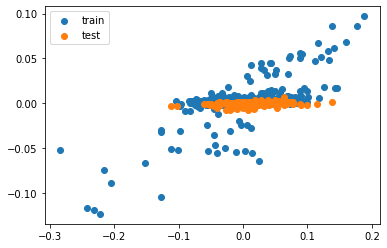

In [97]:
# Use the best hyperparameters from before to fit a random forest model, so we should use 8, but I use 4 for now.
rfr = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
rfr.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = rfr.predict(train_features) #For fitting we pass features and targets, for predict we pass only features and check R^2 and plot
test_predictions = rfr.predict(test_features)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_targets, train_predictions, label='train')
plt.scatter(test_targets, test_predictions, label='test')
plt.legend()
plt.show()

One useful aspect of tree-based methods is the ability to extract feature importances. This is a quantitative way to measure how much each feature contributes to our predictions. It can help us focus on our best features, possibly enhancing or tuning them, and can also help us get rid of useless features that may be cluttering up our model.

In [98]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]                      
#so np.argsort gives us sorted list from lowest to highest. Using [start:stop:step = -1], we reversed the order

x = range(len(importances))
#So x takes how many features to be plotted on barplot.

print(importances)
print(sorted_index)
print(x)

[0.         0.06527071 0.08701934 0.08120607 0.06813794 0.11359109
 0.09874371 0.12271718 0.20884703 0.15446694]
[8 9 7 5 6 2 3 4 1 0]
range(0, 10)


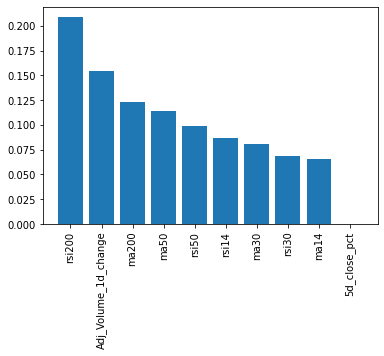

In [99]:
# Create tick labels 
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()


#As you see we should drop most of the useless features 

#Now in essence the flow is this way
Identify best parameters, for a particular train-test split
Fit model on train data
See R^2 score, plot and predict for test and train
See importance of features, drop useless ones, 
start again.

In [100]:
#For now let us try gradient boosting while skipping the step of choosing the best parameters and features, Okie.

In [101]:
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model -- hyperparameters have already been searched for you
gbr = GradientBoostingRegressor(max_features=4,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
gbr.fit(train_features, train_targets)

print(gbr.score(train_features, train_targets))
print(gbr.score(test_features, test_targets))

0.34482641430866456
-0.21380890191591884


In [102]:
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x = range(len(importances))


#x = range(features.shape[1])

#So how many features to be plotted is in x.
#Either use length of importances, or features.shape(1,)


print(importances)
print(sorted_index)
print(x)


[0.         0.06527071 0.08701934 0.08120607 0.06813794 0.11359109
 0.09874371 0.12271718 0.20884703 0.15446694]
[8 7 3 9 5 6 4 2 1 0]
range(0, 10)


In [103]:
features.shape[0]
features.shape[1]

9

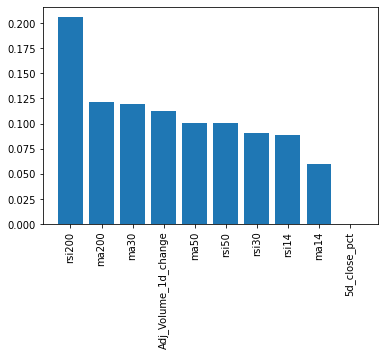

In [104]:
# Create tick labels 
labels = np.array(feature_names)[sorted_index]

plt.bar(x, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()

Some models, like K-nearest neighbors (KNN) & neural networks, work better with scaled data -- so we'll standardize our data.

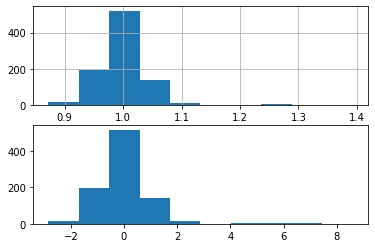

In [105]:
from sklearn.preprocessing import scale

# Remove unimportant features (weekdays)
train_features = train_features.iloc[:, :-4]
test_features = test_features.iloc[:, :-4]

# Standardize the train and test features
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)

# Plot histograms of the 14-day SMA RSI before and after scaling
f, ax = plt.subplots(nrows=2, ncols=1)
train_features.iloc[:, 2].hist(ax=ax[0])
ax[1].hist(scaled_train_features[:, 2])
plt.show()

In [106]:
from sklearn.neighbors import KNeighborsRegressor

for n in range(2, 13):
    # Create and fit the KNN model
    knn = KNeighborsRegressor(n_neighbors=n)
    
    # Fit the model to the training data
    knn.fit(scaled_train_features, train_targets)
    
    # Print number of neighbors and the score to find the best value of n
    print("n_neighbors =", n)
    print('train, test scores')
    print(knn.score(scaled_train_features, train_targets))
    print(knn.score(scaled_test_features, test_targets))
    print()  # prints a blank line

n_neighbors = 2
train, test scores
0.6585949171459384
-0.6972863147171491

n_neighbors = 3
train, test scores
0.5275756974575753
-0.5352257722551639

n_neighbors = 4
train, test scores
0.45253066327755354
-0.35811810699176627

n_neighbors = 5
train, test scores
0.40838058118247145
-0.30554783630708604

n_neighbors = 6
train, test scores
0.36751935491536936
-0.27834395664030853

n_neighbors = 7
train, test scores
0.33439292566974466
-0.2909930503230145

n_neighbors = 8
train, test scores
0.3062226861328482
-0.29489203017128673

n_neighbors = 9
train, test scores
0.29148003498964226
-0.27151109749423186

n_neighbors = 10
train, test scores
0.27074104119757303
-0.27582674831638965

n_neighbors = 11
train, test scores
0.25853080153061236
-0.2635245749238533

n_neighbors = 12
train, test scores
0.2533989366086612
-0.28633330625011766



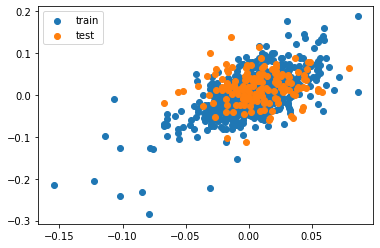

In [107]:
# Create the model with the best-performing n_neighbors of 5
knn = KNeighborsRegressor(n_neighbors=5)

# Fit the model
knn.fit(scaled_train_features, train_targets)

# Get predictions for train and test sets
train_predictions = knn.predict(scaled_train_features)
test_predictions = knn.predict(scaled_test_features)

# Plot the actual vs predicted values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

##NEURAL Networks

In [108]:
from keras.models import Sequential     #import keras.models sequential whereas dense is from keras.layers
from keras.layers import Dense

Let us make a cery simple net for now. 3 layers, specify input in first dense layer and create 3 layers. The last one which gives output is activation = linear.

In [109]:
# Create the model
model_1 = Sequential()
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))  #We give scaled features(i.e. standardised data as input)
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='linear'))

# Fit the model
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_train_features, train_targets, epochs=25)

Epoch 1/25
28/28 [==============================] - 1s 2ms/step - loss: 0.0064
Epoch 2/25
28/28 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 3/25
28/28 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 4/25
28/28 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 5/25
28/28 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 6/25
28/28 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 7/25
28/28 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 8/25
28/28 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 9/25
28/28 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 10/25
28/28 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 11/25
28/28 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 12/25
28/28 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 13/25
28/28 [==============================

Once we've fit a model, we usually check the training loss curve to make sure it's flattened out. The history returned from model.fit() is a dictionary that has an entry, 'loss', which is the training loss. We want to ensure this has more or less flattened out at the end of our training. 
An EPOCH is how many time code goes over the whole data.

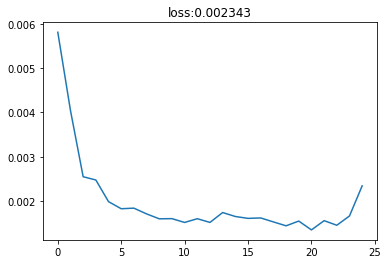

In [110]:
# Plot the losses from the fit
plt.plot(history.history['loss'])

# Use the last loss as the title
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()


#For title we used the last loss value hence [-1]

0.07673795845606068
-1.1655066732518788


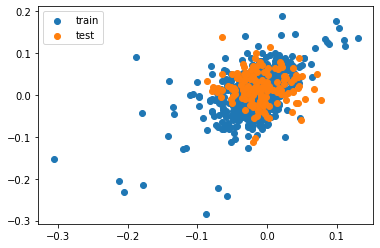

In [111]:
from sklearn.metrics import r2_score

# Calculate R^2 score
train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Plot predictions vs actual
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.legend()
plt.show()

#Why Custom loss function is important
If wrong direction of price change is predicted, we can add a penalty to guide neural net to correct its direction.
Penalty is multiplied by error to increase loss function, and model as it tries to reduce the loss function will correct its direction.


If y_true*y*pred = +ve it was correct direction (++, --)
If y_true*y_pred = -ve , wrong prediction as (+-, -+)

In [112]:
import keras.losses
import tensorflow as tf

# Create loss function
def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty * tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1)

keras.losses.sign_penalty = sign_penalty  # enable use of loss with keras
print(keras.losses.sign_penalty)

<function sign_penalty at 0x7faefe793a70>


Let us test this new custom loss function now

Epoch 1/25
28/28 [==============================] - 1s 2ms/step - loss: 20.0100
Epoch 2/25
28/28 [==============================] - 0s 2ms/step - loss: 0.9698
Epoch 3/25
28/28 [==============================] - 0s 1ms/step - loss: 0.3742
Epoch 4/25
28/28 [==============================] - 0s 2ms/step - loss: 0.3384
Epoch 5/25
28/28 [==============================] - 0s 1ms/step - loss: 0.2516
Epoch 6/25
28/28 [==============================] - 0s 1ms/step - loss: 0.2265
Epoch 7/25
28/28 [==============================] - 0s 2ms/step - loss: 0.2059
Epoch 8/25
28/28 [==============================] - 0s 1ms/step - loss: 0.1629
Epoch 9/25
28/28 [==============================] - 0s 2ms/step - loss: 0.1372
Epoch 10/25
28/28 [==============================] - 0s 2ms/step - loss: 0.1275
Epoch 11/25
28/28 [==============================] - 0s 2ms/step - loss: 0.1410
Epoch 12/25
28/28 [==============================] - 0s 1ms/step - loss: 0.1136
Epoch 13/25
28/28 [=============================

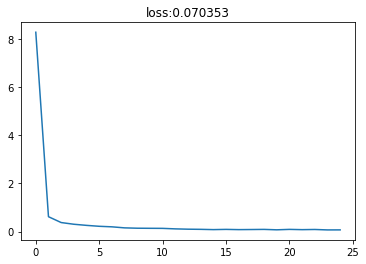

In [113]:
# Create the model
model_2 = Sequential()
model_2.add(Dense(100, input_dim= scaled_train_features.shape[1], activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(1, activation='linear'))

# Fit the model with our custom 'sign_penalty' loss function
model_2.compile(optimizer='adam', loss='sign_penalty')
history = model_2.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

In [114]:
#Let us see how well it performed

0.12145294830801334
-0.6621824794589835


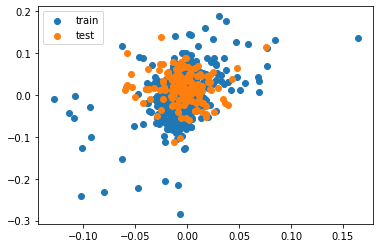

In [115]:
# Evaluate R^2 scores
train_preds = model_2.predict(scaled_train_features)
test_preds = model_2.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')  # plot test set
plt.legend(); plt.show()

^ We observe a bow-tie shape as direction of actual vs predicted is the same.

To prevent overfitting, let us use dropout and ensembling

Epoch 1/25
28/28 [==============================] - 1s 2ms/step - loss: 0.0215
Epoch 2/25
28/28 [==============================] - 0s 1ms/step - loss: 0.0129
Epoch 3/25
28/28 [==============================] - 0s 2ms/step - loss: 0.0141
Epoch 4/25
28/28 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 5/25
28/28 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 6/25
28/28 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 7/25
28/28 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 8/25
28/28 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 9/25
28/28 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 10/25
28/28 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 11/25
28/28 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 12/25
28/28 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 13/25
28/28 [==============================

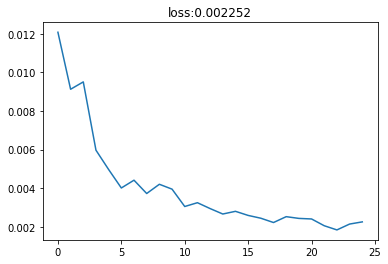

In [116]:
from keras.layers import Dropout

# Create model with dropout
model_3 = Sequential()
model_3.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(1, activation='linear'))

# Fit model with mean squared error loss function
model_3.compile(optimizer='adam', loss='mse')
history = model_3.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

To ensemble our neural net predictions, we'll make predictions with the 3 models we just created -- the basic model, the model with the custom loss function, and the model with dropout. 
Then we'll combine the predictions with numpy's .hstack() function, and average them across rows with np.mean(predictions, axis=1)

In [117]:
# Make predictions from the 3 neural net models
train_pred1 = model_1.predict(scaled_train_features)
test_pred1 = model_1.predict(scaled_test_features)

train_pred2 = model_2.predict(scaled_train_features)
test_pred2 = model_2.predict(scaled_test_features)

train_pred3 = model_3.predict(scaled_train_features)
test_pred3 = model_3.predict(scaled_test_features)

# Horizontally stack predictions and take the average across rows
train_preds = np.mean(np.hstack((train_pred1, train_pred2, train_pred3)), axis=1) #axis = 1 is for np.mean to take mean of rows not column wise
test_preds = np.mean(np.hstack((test_pred1, test_pred2, test_pred3)), axis=1)
print(test_preds[-5:])              #So start from bottom, see last 5 rows

[-0.05524711 -0.03440658 -0.01517052 -0.00460727 -0.03085421]


0.17951811374753213
-0.7597081196110855


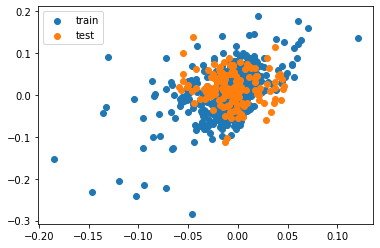

In [118]:
from sklearn.metrics import r2_score

# Evaluate the R^2 scores
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train') #train predictions vs train actual
plt.scatter(test_preds, test_targets, label='test')
plt.legend(); plt.show()

Plotting the efficient frontier of MPT

Our first step towards calculating modern portfolio theory (MPT) portfolios is to get daily and monthly returns. Eventually we're going to get the best portfolios of each month based on the Sharpe ratio. The easiest way to do this is to put all our stock prices into one DataFrame, then to resample them to the daily and monthly time frames. We need daily price changes to calculate volatility, which we will use as our measure of risk.

#STEP 1
Join together lng_df, spy_df, and smlv_df using pd.concat() into the full_df DataFrame.
Resample the full_df to Business Month Start ('BMS') frequency.
Get the daily percent change of full_df with .pct_change()

In [119]:
# Join 3 stock DataFrame together
lng_df = lng_df['Adj Close']
spy_df = spy_df['Adj Close']
amd_df = amd_df['Adj Close']

lng_df = lng_df.rename({'Adj Close': 'lng'})
spy_df = spy_df.rename({'Adj Close': 'spy'})
amd_df = amd_df.rename({'Adj Close': 'amd'})

full_df = pd.concat([lng_df, spy_df, amd_df], axis=1).dropna()
print(full_df)
# Resample the full DataFrame to monthly timeframe
monthly_df = full_df.resample('BMS').first()

# Calculate daily returns of stocks
returns_daily = full_df.pct_change()

# Calculate monthly returns of the stocks
returns_monthly = monthly_df.pct_change().dropna()
print(returns_monthly.tail())

            Adj Close   Adj Close  Adj Close
Date                                        
2017-04-27  45.400002  221.523102  13.620000
2017-04-28  45.349998  221.040314  13.300000
2017-05-01  45.619999  221.597382  13.620000
2017-05-02  46.160000  221.680954  10.320000
2017-05-03  45.660000  221.411713  10.390000
...               ...         ...        ...
2021-06-18  83.250000  414.920013  84.650002
2021-06-21  85.239998  420.859985  82.589996
2021-06-22  86.830002  423.109985  83.580002
2021-06-23  87.519997  422.600006  83.820000
2021-06-24  87.500000  425.100006  86.099998

[1048 rows x 3 columns]
            Adj Close  Adj Close  Adj Close
Date                                       
2021-02-01   0.073502   0.020174  -0.050271
2021-03-01   0.079538   0.035484  -0.014488
2021-04-01   0.051707   0.031680  -0.061350
2021-05-03   0.097493   0.043908  -0.031323
2021-06-01   0.082741   0.003515   0.028771


We'll now loop through each month in the returns_monthly DataFrame, and calculate the covariance of the daily returns.

In [120]:
# Daily covariance of stocks (for each monthly period)
covariances = {}
rtd_idx = returns_daily.index
for i in returns_monthly.index:
    # Mask daily returns for each month and year, and calculate covariance
    mask = (rtd_idx.month == i.month) & (rtd_idx.year == i.year)
    
    # Use the mask to get daily returns for the current month and year of monthy returns index
    covariances[i] = returns_daily[mask].cov()

print(covariances[i])

           Adj Close  Adj Close  Adj Close
Adj Close   0.000227   0.000062  -0.000095
Adj Close   0.000062   0.000042   0.000011
Adj Close  -0.000095   0.000011   0.000354


We'll now generate portfolios to find each month's best one. numpy's random.random() generates random numbers from a uniform distribution, then we normalize them so they sum to 1 using the /= operator. We use these weights to calculate returns and volatility. Returns are sums of weights times individual returns. Volatility is more complex, and involves the covariances of the different stocks.

Finally we'll store the values in dictionaries for later use, with months' dates as keys.

In this case, we will only generate 10 portfolios for each date so the code will run faster, but in a real-world use-case you'd want to use more like 1000 to 5000 randomly-generated portfolios for a few stocks.

In [121]:
portfolio_returns, portfolio_volatility, portfolio_weights = {}, {}, {}

# Get portfolio performances at each month
for date in sorted(covariances.keys()):
    cov = covariances[date]
    for portfolio in range(10):
        weights = np.random.random(3)
        weights /= np.sum(weights) # /= divides weights by their sum to normalize 
        returns = np.dot(weights, returns_monthly.loc[date])
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))
        portfolio_returns.setdefault(date, []).append(returns)
        portfolio_volatility.setdefault(date, []).append(volatility)
        portfolio_weights.setdefault(date, []).append(weights)

print(portfolio_weights[date][0])

[0.43177887 0.42581292 0.1424082 ]


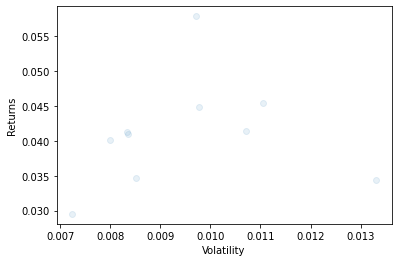

In [122]:
# Get latest date of available data
date = sorted(covariances.keys())[-1]  

# Plot efficient frontier
# warning: this can take at least 10s for the plot to execute...
plt.scatter(x=portfolio_volatility[date], y=portfolio_returns[date], alpha=0.1)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.show()

Get best Sharpe ratios
We need to find the "ideal" portfolios for each date so we can use them as targets for machine learning. We'll loop through each date in portfolio_returns, then loop through the portfolios we generated with portfolio_returns[date]. We'll then calculate the Sharpe ratio, which is the return divided by volatility (assuming a no-risk return of 0).

We use enumerate() to loop through the returns for the current date (portfolio_returns[date]) and keep track of the index with i. Then we use the current date and current index to get the volatility of each portfolio with portfolio_volatility[date][i]. Finally, we get the index of the best Sharpe ratio for each date using np.argmax(). We'll use this index to get the ideal portfolio weights soon.

In [123]:
# Empty dictionaries for sharpe ratios and best sharpe indexes by date
sharpe_ratio, max_sharpe_idxs = {}, {}

# Loop through dates and get sharpe ratio for each portfolio
for date in portfolio_returns.keys():
    for i, ret in enumerate(portfolio_returns[date]):
    
        # Divide returns by the volatility for the date and index, i
        sharpe_ratio.setdefault(date, []).append(ret / portfolio_volatility[date][i])

    # Get the index of the best sharpe ratio for each date
    max_sharpe_idxs[date] = np.argmax(sharpe_ratio[date])

print(portfolio_returns[date][max_sharpe_idxs[date]])

0.0579079501416932


In [124]:
# Calculate exponentially-weighted moving average of daily returns
ewma_daily = returns_daily.ewm(span=30).mean()

# Resample daily returns to first business day of the month with the first day for that month
ewma_monthly = ewma_daily.resample('BMS').first()

# Shift ewma for the month by 1 month forward so we can use it as a feature for future predictions 
ewma_monthly = ewma_monthly.shift(1).dropna()

print(ewma_monthly.iloc[-1])

Adj Close    0.004586
Adj Close    0.001598
Adj Close   -0.002243
Name: 2021-06-01 00:00:00, dtype: float64


In [125]:
targets, features = [], []

# Create features from price history and targets as ideal portfolio
for date, ewma in ewma_monthly.iterrows():

    # Get the index of the best sharpe ratio
    best_idx = max_sharpe_idxs[date]
    targets.append(portfolio_weights[date][best_idx])
    features.append(ewma)  # add ewma to features

targets = np.array(targets)
features = np.array(features)
print(targets[-5:])

[[0.42984523 0.4132995  0.15685528]
 [0.87497383 0.11010292 0.01492325]
 [0.91252581 0.07194231 0.01553188]
 [0.52955716 0.4252148  0.04522803]
 [0.62287452 0.17737291 0.19975257]]


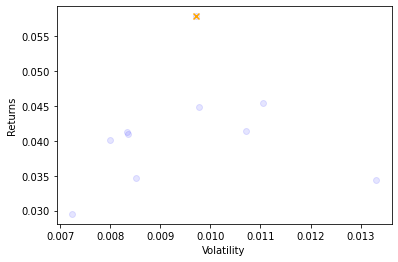

In [126]:
# Get most recent (current) returns and volatility
date = sorted(covariances.keys())[-1]
cur_returns = portfolio_returns[date]
cur_volatility = portfolio_volatility[date]

# Plot efficient frontier with sharpe as point
plt.scatter(x=cur_volatility, y=cur_returns, alpha=0.1, color='blue')
best_idx = max_sharpe_idxs[date]

# Place an orange "X" on the point with the best Sharpe ratio
plt.scatter(x=cur_volatility[best_idx], y=cur_returns[best_idx], marker='x', color='orange')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.show()

Make predictions with a random forest

In [127]:
# Make train and test features
train_size = int(0.85 * features.shape[0])
train_features = features[:train_size]
test_features = features[train_size:]
train_targets = targets[:train_size]
test_targets = targets[train_size:]

# Fit the model and check scores on train and test
rfr = RandomForestRegressor(n_estimators=300, random_state=42)
rfr.fit(train_features, train_targets)
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.81637174365712
-1.9136599642588337


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

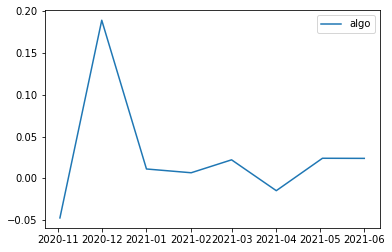

In [133]:
# Get predictions from model on train and test
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

# Calculate and plot returns from our RF predictions and the SPY returns
test_returns = np.sum(returns_monthly.iloc[train_size:] * test_predictions, axis=1)
plt.plot(test_returns, label='algo')
#plt.plot(returns_monthly['spy'].iloc[train_size:], label='SPY')          #Commenting it out as spy is somehow not being read and giving error
                                                                          #although it is very important to have spy plotted, otherwise what will we compare it with
plt.legend()
plt.show()

Evaluate returns
Let's now see how our portfolio selection would perform as compared with just investing in the SPY. We'll do this to see if our predictions are promising, despite the low R value.

We will set a starting value for our investment of $1000, then loop through the returns from our predictions as well as from SPY. We'll use the monthly returns from our portfolio selection and SPY and apply them to our starting cash balance. From this we will get a month-by-month picture of how our investment is doing, and we can see how our predictions did overall vs the SPY. Next, we can plot our portfolio from our predictions and compare it to SPY.

In [131]:
# Calculate the effect of our portfolio selection on a hypothetical $1k investment
cash = 1000
algo_cash, spy_cash = [cash], [cash]  # set equal starting cash amounts
for r in test_returns:
    cash *= 1 + r
    algo_cash.append(cash)

# Calculate performance for SPY
cash = 1000  # reset cash amount
for r in returns_monthly['spy'].iloc[train_size:]:           #hence the same error here because of before
    cash *= 1 + r
    spy_cash.append(cash)

print('algo returns:', (algo_cash[-1] - algo_cash[0]) / algo_cash[0])
print('SPY returns:', (spy_cash[-1] - spy_cash[0]) / spy_cash[0])

KeyError: ignored

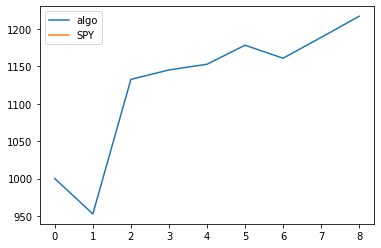

In [132]:
# Plot the algo_cash and spy_cash to compare overall returns
plt.plot(algo_cash, label="algo")
plt.plot(spy_cash, label='SPY')
plt.legend()  # show the legend
plt.show()